Masume Shariftabar - 9927613

load dataset

In [1]:
import os

#define the folder name
folder_name = "Data"

#check if the folder already exists, and create it if not
if not os.path.exists(folder_name):
  os.makedirs(folder_name)

%cd Data

!pip install --upgrade --no-cache-dir gdown
!gdown 1vl0LDTXqy28Jhy22A70e_KjqhFdoA3xA

/content/Data
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1vl0LDTXqy28Jhy22A70e_KjqhFdoA3xA
To: /content/Data/data.csv
100% 527k/527k [00:00<00:00, 21.8MB/s]


Read CSV and file Info

In [2]:
import pandas as pd
import numpy as np

#upload dataset as dataframe
df = pd.read_csv('/content/Data/data.csv')

# to print the full summary
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Count NAN data

In [3]:
# Count NaN values in each column
df.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Encode datas as number

In [11]:
import pandas as pd

#upload dataset as dataframe
df = pd.read_csv('/content/Data/data.csv')

#iterate over each column in the dataframe
for col in df.columns:
  #check if column has non-numeric data
  if df[col].dtype == 'object':
    #encode values as integer
    df[col] = pd.factorize(df[col])[0]

#save new dataframe
df.to_csv('/content/Data/data2.csv', index=False)

Correlation Matrix

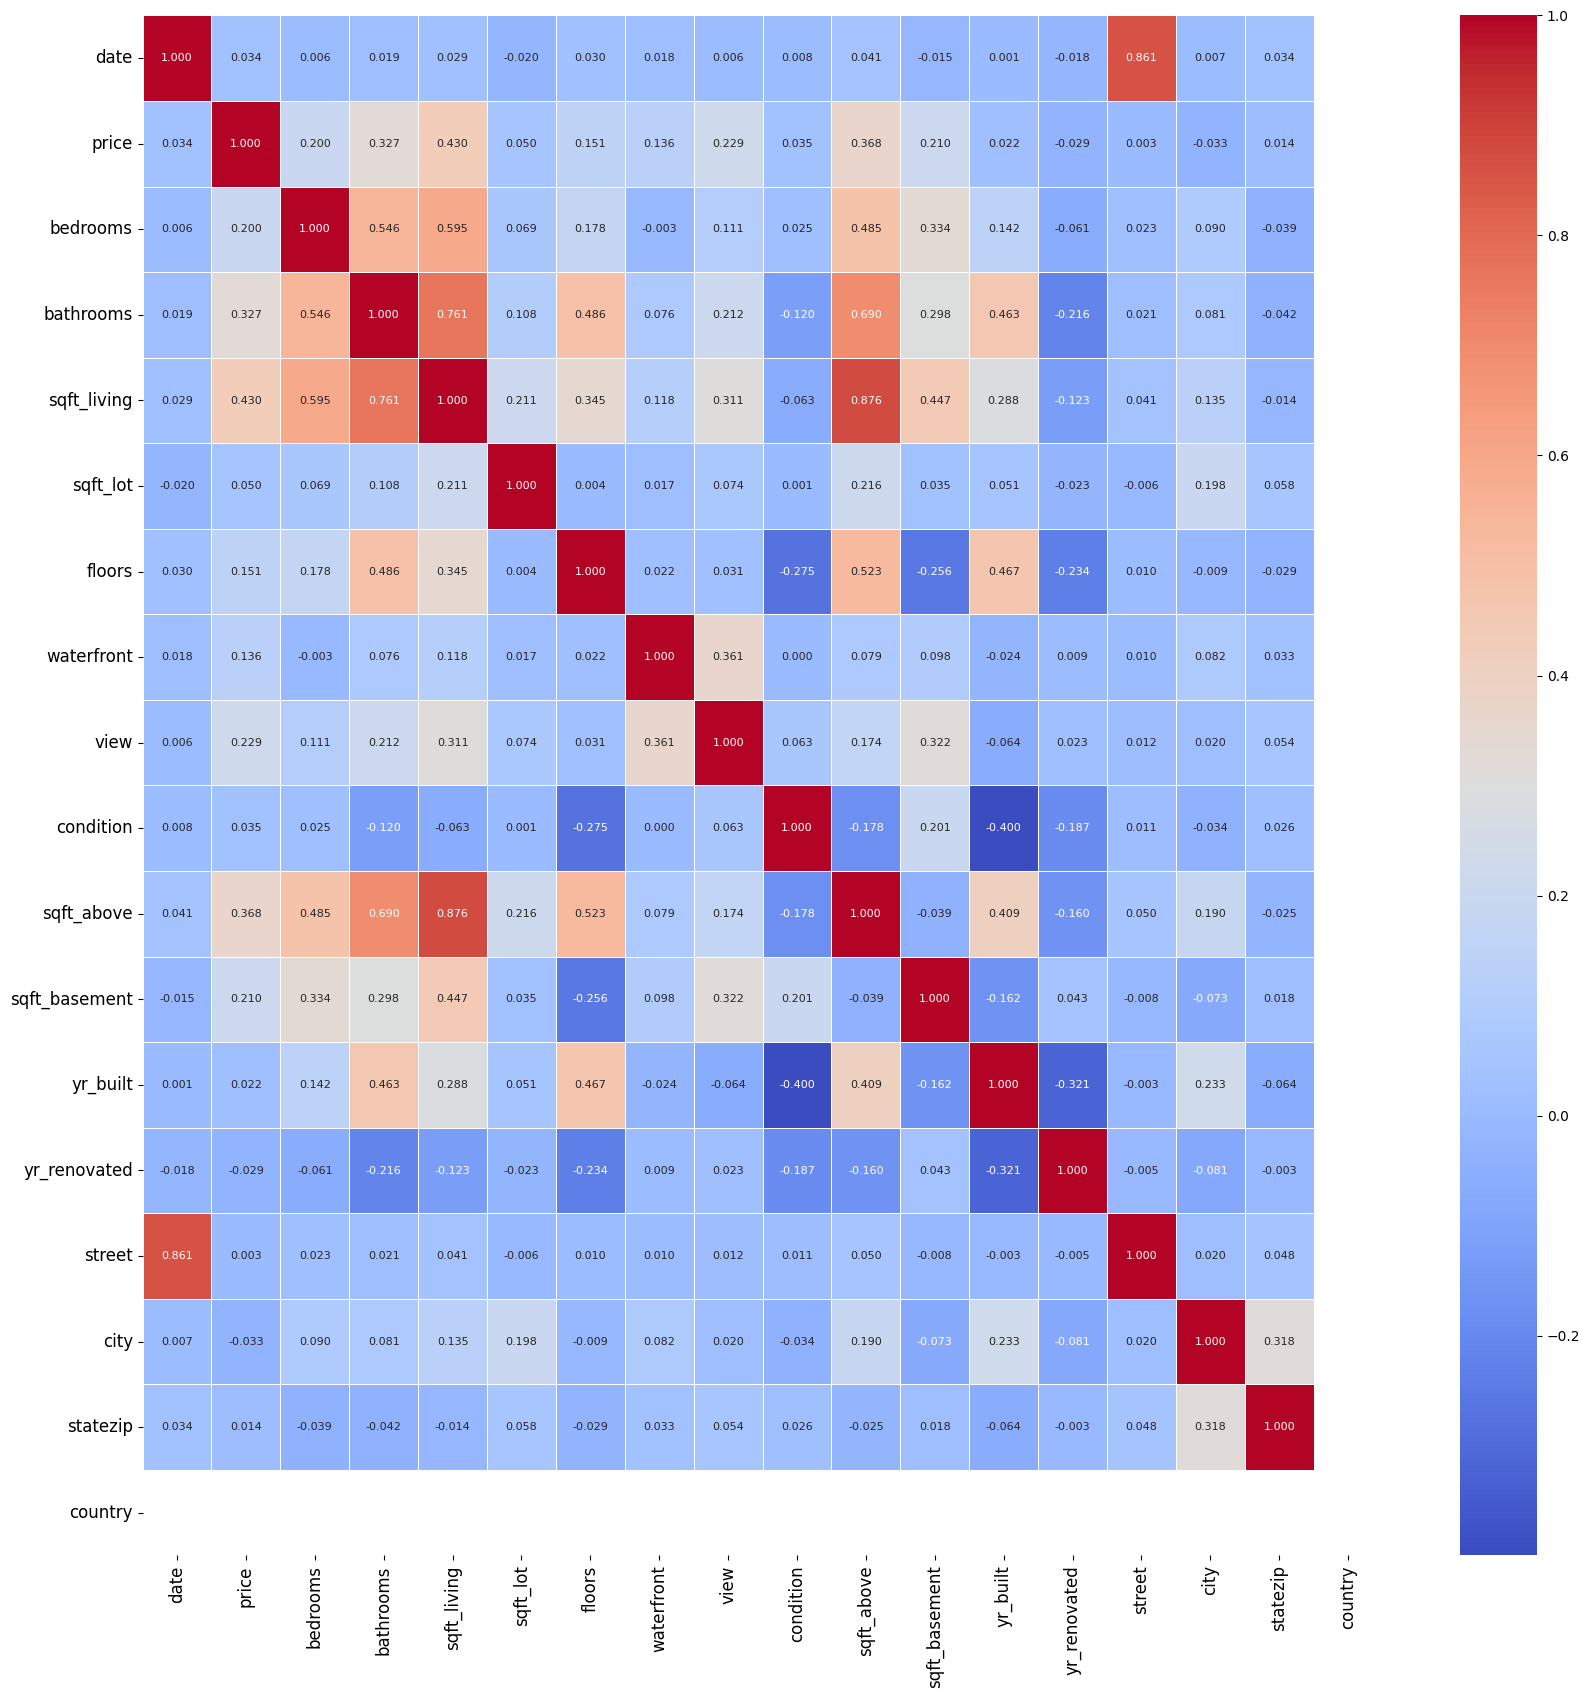

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame
df = pd.read_csv('/content/Data/data2.csv')

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap using seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f', yticklabels=corr_matrix.columns)

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.savefig('PIcS1.pdf', bbox_inches='tight')

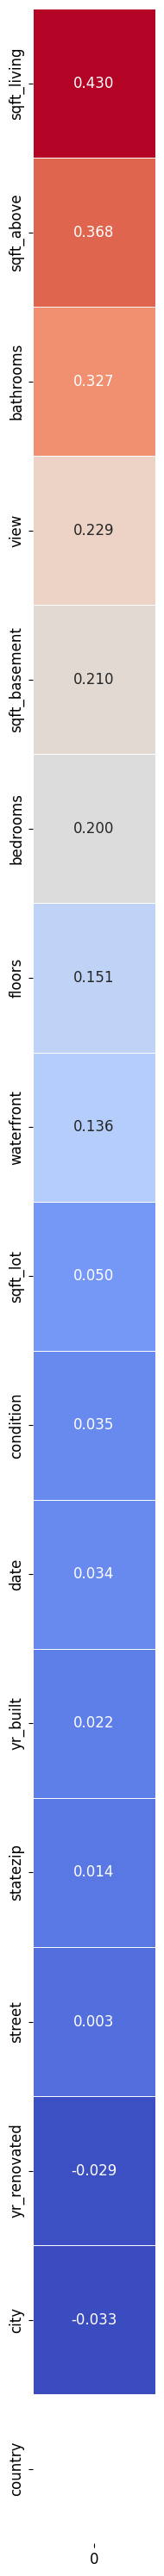

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into DataFrame
df = pd.read_csv('/content/Data/data2.csv')

# Select columns to include in correlation matrix
cols = df.columns.tolist()
cols.remove('price')

# Calculate correlation matrix
corr_matrix = df[cols].corrwith(df['price']).sort_values(ascending=False)

# Create heatmap using seaborn
plt.figure(figsize=(2,30))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, fmt='.3f', cbar=False)

# Rotate x-axis tick labels to be horizontal
plt.xticks(rotation=0)

# Adjust font size of annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust margins of PDF file
plt.tight_layout()
plt.savefig('priceCM1.pdf', bbox_inches='tight')

4.3

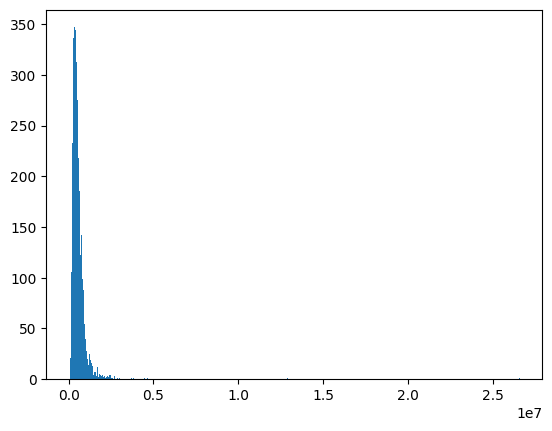

<Axes: xlabel='sqft_living', ylabel='price'>

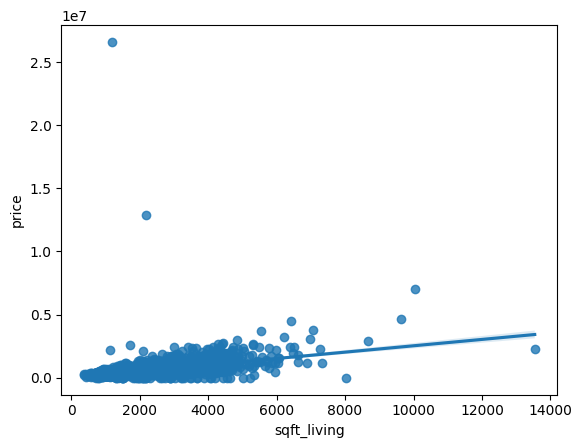

In [8]:
import matplotlib.pyplot as plt
plt.hist(df['price'], bins = 'auto')
plt.show()

import seaborn as sns
sns.regplot(x = df['sqft_living'], y = df['price'])

4.4

In [7]:
df[['year', 'month', 'day']] = df['date'].str.split('-', expand = True)
df = df.drop('date', axis = 1)
df = df.drop('day', axis = 1)
print(df)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3    

Train Test(80/20)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read data from CSV file into a Pandas dataframe
data = pd.read_csv('/content/Data/data2.csv')

# Split the data into train and test sets
train_data, test_data, train_label, test_label = train_test_split(data.drop(['price'], axis=1), data['price'], test_size=0.2, random_state=13)

# Save train and test data to new CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Save train and test labels to new CSV files
train_label.to_csv('train_label.csv', index=False)
test_label.to_csv('test_label.csv', index=False)

# Print shape of each set
print(f"train_data shape: {train_data.shape}")
print(f"test_data shape: {test_data.shape}")
print(f"train_label shape: {train_label.shape}")
print(f"test_label shape: {test_label.shape}")

train_data shape: (3680, 17)
test_data shape: (920, 17)
train_label shape: (3680,)
test_label shape: (920,)


MimMaxScaler

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# read csv file into a pandas dataframe
data = pd.read_csv('/content/Data/data2.csv')

# extract label column as y
y = data['price']

# extract all other columns as X
X = data.drop(columns=['price'])

# split data into train and test sets with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# scale the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# scale the test data using the same scaler used for training data
X_test_scaled = scaler.transform(X_test)

# save train and test data/label in new files
pd.DataFrame(X_train_scaled).to_csv('Xtrain.csv', index=False)
y_train.to_csv('ytrain.csv', index=False)
pd.DataFrame(X_test_scaled).to_csv('Xtest.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

MLP

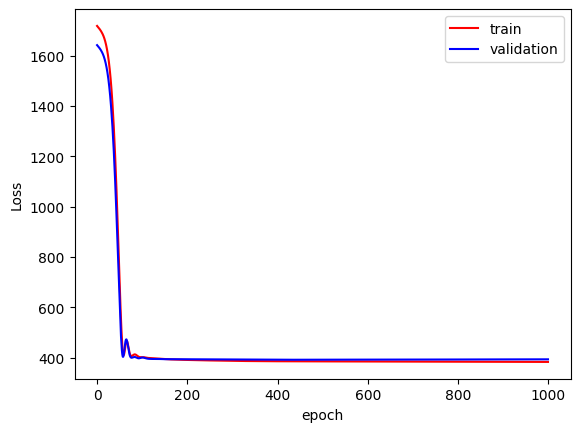

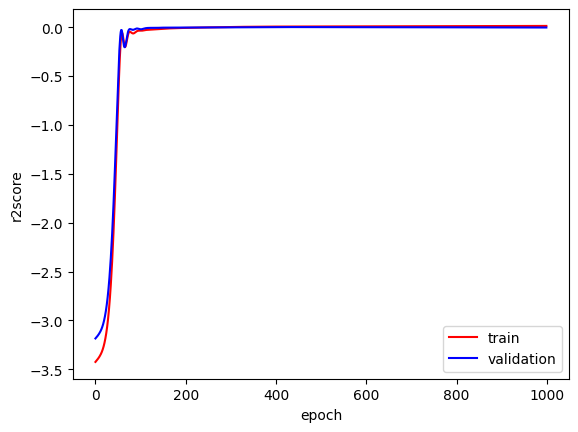

Loss: tensor(389.1741)R2 Score: -0.011962293598395402


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

class MLP(nn.Module):
  def __init__(self, num_input, num_hidden1, num_hidden2, num_hidden3, num_output):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(num_input, num_hidden1)
    self.fc2 = nn.Linear(num_hidden1, num_hidden2)
    self.fc3 = nn.Linear(num_hidden2, num_hidden3)
    self.fc4 = nn.Linear(num_hidden3, num_output)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = self.fc4(x)
    return x

from sklearn.model_selection import train_test_split
X = df.values[:, 1 : 13]
y = df.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

def train(model, optimizer, criterion, X_train, y_train, X_val, y_val, num_epoch = 1000):
  train_loss_list = []
  validation_loss_list = []
  train_r2score_list = []
  r2score_list = []

  for i in range(num_epoch):
    model.train()
    optimizer.zero_grad()
    yhat_train = model(X_train)
    train_loss = criterion(yhat_train.squeeze(), y_train)
    train_loss.backward()
    optimizer.step()
    train_loss_list.append(train_loss.item())
    train_r2score = r2_score(y_train, yhat_train.squeeze().detach().numpy())
    train_r2score_list.append(train_r2score)

    model.eval()
    with torch.no_grad():
      yhat_val = model(X_val)
      val_loss = criterion(yhat_val.squeeze(), y_val)
      validation_loss_list.append(val_loss.item())
      r2score = r2_score(y_val, yhat_val.squeeze().detach().numpy())
      r2score_list.append(r2score)

  plt.plot(train_loss_list, color = 'red', label = 'train')
  plt.plot(validation_loss_list, color = 'blue', label = 'validation')
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  plt.plot(train_r2score_list, color = 'red', label = 'train')
  plt.plot(r2score_list, color = 'blue', label = 'validation')
  plt.xlabel('epoch')
  plt.ylabel('r2score')
  plt.legend()
  plt.show()

X_train = torch.Tensor(X_train)
y_train = y_train.astype(float)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = y_val.astype(float)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = y_test.astype(float)
y_test = torch.Tensor(y_test)

mlp = MLP(12, 50, 100, 150, 1)
optimizer = optim.Adam(mlp.parameters(), lr = 0.001)
criterian = nn.MSELoss()
mlp_ = train(mlp, optimizer, criterian, X_train, y_train, X_val, y_val, num_epoch = 1000)

mlp.eval()
with torch.no_grad():
  yhat = mlp(X_test)
  test_loss = criterian(yhat.squeeze(), y_test)
  test_r2score = r2_score(y_test, yhat.squeeze().detach().numpy())

print("Loss: " + str(test_loss) + "R2 Score: " + str(test_r2score))


4.7

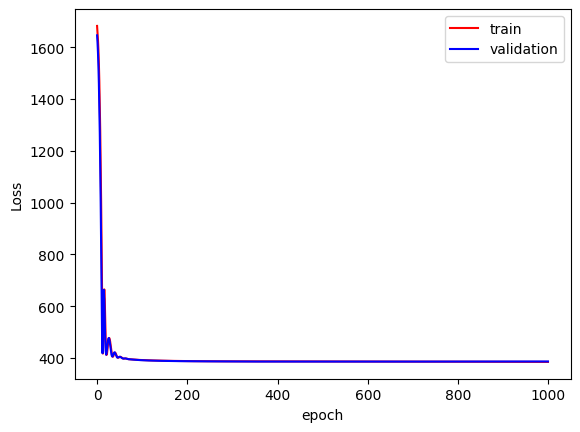

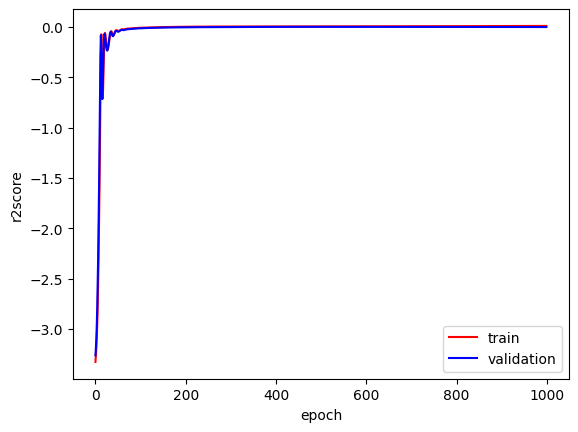

Loss: tensor(388.8829)R2 Score: -0.00260579810654038





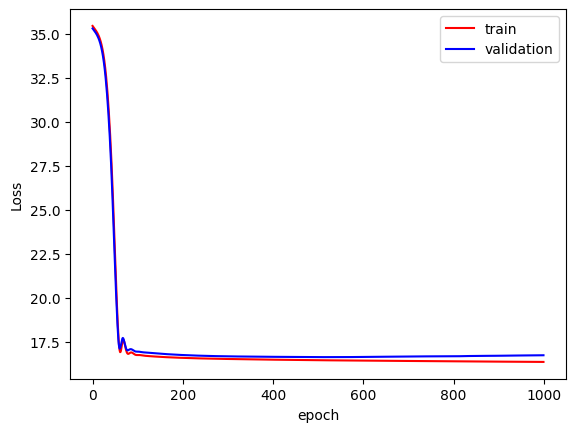

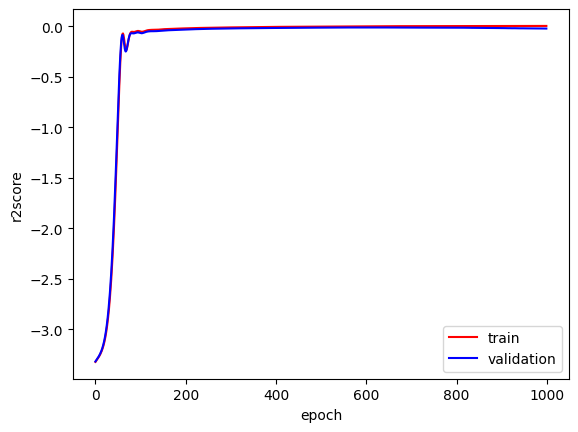

Loss: tensor(16.5387)R2 Score: -0.015055563539662975


In [20]:

mlp2 = MLP(12, 50, 100, 150, 1)
optimizer = optim.Adamax(mlp2.parameters(), lr = 0.01)
criterian = nn.MSELoss()
mlp_ = train(mlp2, optimizer, criterian, X_train, y_train, X_val, y_val, num_epoch = 1000)

mlp2.eval()
with torch.no_grad():
  yhat = mlp2(X_test)
  test_loss = criterian(yhat.squeeze(), y_test)
  test_r2score = r2_score(y_test, yhat.squeeze().detach().numpy())

print("Loss: " + str(test_loss) + "R2 Score: " + str(test_r2score))

print('\n' + '\n')

mlp3 = MLP(12, 50, 100, 150, 1)
optimizer = optim.Adam(mlp3.parameters(), lr = 0.001)
criterian = nn.HuberLoss()
mlp_ = train(mlp3, optimizer, criterian, X_train, y_train, X_val, y_val, num_epoch = 1000)

mlp3.eval()
with torch.no_grad():
  yhat = mlp3(X_test)
  test_loss = criterian(yhat.squeeze(), y_test)
  test_r2score = r2_score(y_test, yhat.squeeze().detach().numpy())

print("Loss: " + str(test_loss) + "R2 Score: " + str(test_r2score))


4.8

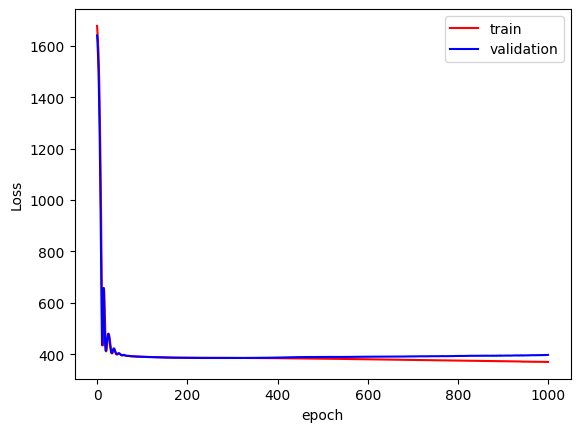

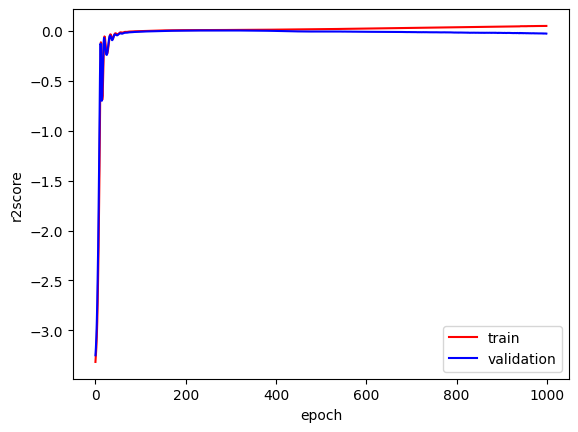

Loss: tensor(397.8002)R2 Score: -0.02559610365856524
y_test: tensor(47.)
predicted y: tensor([32.5721])


y_test: tensor(21.)
predicted y: tensor([34.3551])


y_test: tensor(10.)
predicted y: tensor([36.3831])


y_test: tensor(18.)
predicted y: tensor([37.5239])


y_test: tensor(54.)
predicted y: tensor([39.7128])




In [21]:
import tensorflow as tf

mlp = MLP(12, 50, 100, 150, 1)
optimizer = optim.Adamax(mlp.parameters(), lr = 0.01)
criterian = nn.MSELoss()
mlp_ = train(mlp, optimizer, criterian, X_train, y_train, X_val, y_val, num_epoch = 1000)

mlp.eval()
with torch.no_grad():
  yhat = mlp(X_test)
  test_loss = criterian(yhat.squeeze(), y_test)
  test_r2score = r2_score(y_test, yhat.squeeze().detach().numpy())

print("Loss: " + str(test_loss) + "R2 Score: " + str(test_r2score))

y_test.reshape([1, 920])
yhat.reshape([1, 920])

for i in range(0, 5):
  n = np.random.randint(0, int(len(y)* 0.2))
  print("y_test: " + str(y_test[n]))
  print("predicted y: " + str(yhat[n]))
  print('\n')